# **Objective**

> This notebook is designed to help a running footwear and apparel company make better decisions by understanding its customers. Using survey data, we analyze running habits to uncover distinct groups of consumers through clustering techniques. These groups provide insights into different types of runners—such as casual joggers, competitive athletes, or style-conscious users—and their unique needs. The goal is to use these findings to recommend tailored products and marketing strategies that resonate with each segment, ultimately helping the company better serve its customers and grow its business.

# **Team Members**



1.   Aalap Desai
2.   Tirth Desai



# **Data Preparation**


The data needs to be cleaned and prepared for clustering. This includes handling missing values, normalizing data, and selecting relevant columns for analysis.







In [1]:

from google.colab import files
uploaded = files.upload()
file_path='survey_data.xlsx'


Saving survey_data.xlsx to survey_data (1).xlsx


In [2]:
# Importing necessary packages for the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_excel(file_path)


In [3]:
df.shape

(175, 47)

In [4]:
#checking Data types of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 47 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   record  175 non-null    int64
 1   id      175 non-null    int64
 2   S1r1    175 non-null    int64
 3   S1r2    175 non-null    int64
 4   S1r3    175 non-null    int64
 5   S2r1    175 non-null    int64
 6   S2r2    175 non-null    int64
 7   S3r1    175 non-null    int64
 8   S3r2    175 non-null    int64
 9   S4r1    175 non-null    int64
 10  S4r2    175 non-null    int64
 11  S4r3    175 non-null    int64
 12  S4r4    175 non-null    int64
 13  S4r5    175 non-null    int64
 14  S4r6    175 non-null    int64
 15  Q1r1    175 non-null    int64
 16  Q1r2    175 non-null    int64
 17  Q1r3    175 non-null    int64
 18  Q2r1    175 non-null    int64
 19  Q2r2    175 non-null    int64
 20  Q2r3    175 non-null    int64
 21  Q2r4    175 non-null    int64
 22  Q3r1    175 non-null    int64
 23  Q3r2    175 non

In [5]:
#Checking for missing values in dataset
df.isna().sum()

,0
record,0
id,0
S1r1,0
S1r2,0
S1r3,0
S2r1,0
S2r2,0
S3r1,0
S3r2,0
S4r1,0


In [6]:

data = df.drop(['record', 'id'], axis=1)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)



# **Similarity Metric & Matrix**

Cosine similarity was chosen because it works well with our dataset, which is made up of normalized survey responses. Each row represents a participant, and each column captures something like their running preferences. This metric focuses on the angle between data points rather than their size, so it highlights patterns in behavior without being affected by differences in scale. Essentially, participants with similar preferences will have smaller angles, meaning they’re more alike. Cosine similarity also has other benefits: it’s easy to interpret (values range from 0 for completely similar to 1 for completely different), and it’s perfect for clustering methods that rely on this kind of pairwise comparison.

In [7]:
#import necessary packages
from sklearn.metrics import pairwise_distances

# Calculate cosine similarity matrix
similarity_matrix = pairwise_distances(normalized_data, metric='cosine')

# Convert to a DataFrame for better visualization
similarity_matrix_df = pd.DataFrame(similarity_matrix)

# Output Details
print("Similarity Matrix Shape:", similarity_matrix_df.shape)
similarity_matrix_df.head()

Similarity Matrix Shape: (175, 175)


,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,0.000000,0.804417,1.240622,1.154238,1.283815,1.154576,1.150864,0.882169,1.120709,0.794669,...,0.445606,1.244705,1.126901,0.892773,0.825718,1.182348,1.225624,1.134482,1.150757,1.352365
1,0.804417,0.000000,0.754612,0.679779,1.424446,1.067108,0.983299,0.950422,1.178887,0.888538,...,0.589561,1.171119,1.117031,1.071062,0.904231,0.876714,0.854172,1.188992,0.883775,0.883524
2,1.240622,0.754612,0.000000,0.809118,1.279435,0.895041,1.097299,1.065103,1.318896,0.893036,...,1.205332,0.796389,1.013512,1.008967,0.959138,0.483445,0.492289,0.831120,0.471984,0.280715
3,1.154238,0.679779,0.809118,0.000000,0.960004,1.280579,0.330825,1.368024,0.856040,0.932143,...,0.848504,1.215650,1.149486,1.251956,1.261122,1.140044,1.094818,1.233606,1.110916,0.806593
4,1.283815,1.424446,1.279435,0.960004,0.000000,1.310761,0.818996,1.297210,0.571910,0.849597,...,1.212604,1.245889,1.059367,1.277926,1.291841,1.172894,1.245792,1.263403,1.138981,1.294251


**Why Euclidean Distance?**
    
Euclidean distance is one of the most widely used metrics for measuring similarity in clustering tasks. Here's why it is suitable for this project:

1.   Euclidean distance measures the straight-line distance between two points, making it easy to understand and use.

2.  Since our survey data is mostly numbers, Euclidean distance is a good fit. By normalizing the data, we ensure that all features contribute equally.

3.   Smaller distances mean participants are more similar, while larger distances mean they are more different. It's straightforward and clear.

4.   Many clustering methods, like K-means, naturally use Euclidean distance, so it works perfectly for our analysis.

# **Clustering Algorithm**

**Why K-means Clustering?**
*   K-means is simple and effective for dividing numerical data into groups, making it a good choice for this survey.
*   It works quickly, even with larger datasets, saving time and effort.
*   K-means creates round-shaped clusters, which matches well with our normalized survey data.

In [8]:

from sklearn.metrics import silhouette_score
# Arrary to store shilhoutte score
silhouette_scores = []
# Loop to check optimal number of Cluster based on shiloutte score
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(similarity_matrix)
    score = silhouette_score(similarity_matrix, labels)
    silhouette_scores.append(score)


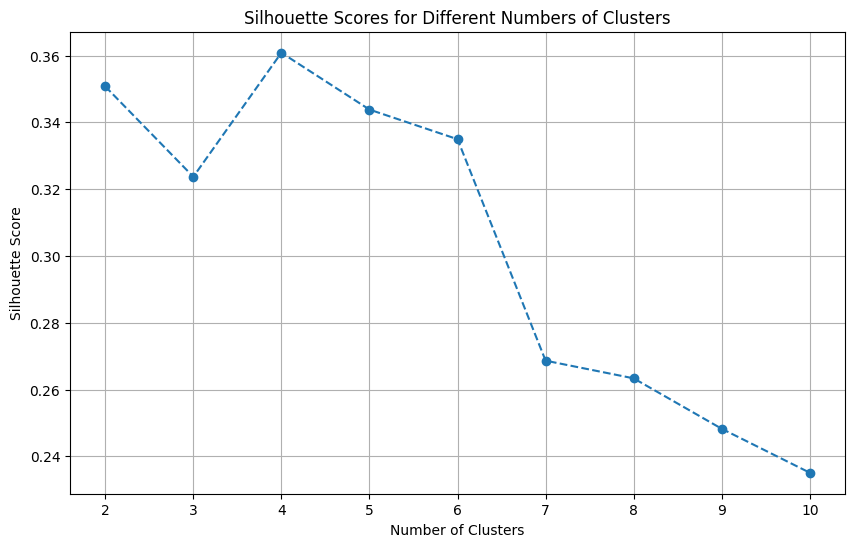

In [9]:
# Plot the silhouette scores to find the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2,11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2,11))
plt.grid()
plt.show()

In [15]:
#range of Cluster Number to evaluate optimal cluster number
cluster_range = range(2,11)
#Calculate optimal cluster number based on silhouette score
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
# Print Optimal Number of Cluster
print(f"Optimal number of clusters based on silhouette score: {optimal_clusters}")


Optimal number of clusters based on silhouette score: 4


In [16]:
#Initialize the KMeans algorithm with the optimal number of clusters
final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
# Fit the KMeans model on the similarity matrix and assign cluster labels
final_labels = final_kmeans.fit_predict(similarity_matrix)
# ADding Cluster Labels as a new column in the data set
df['Cluster'] = final_labels

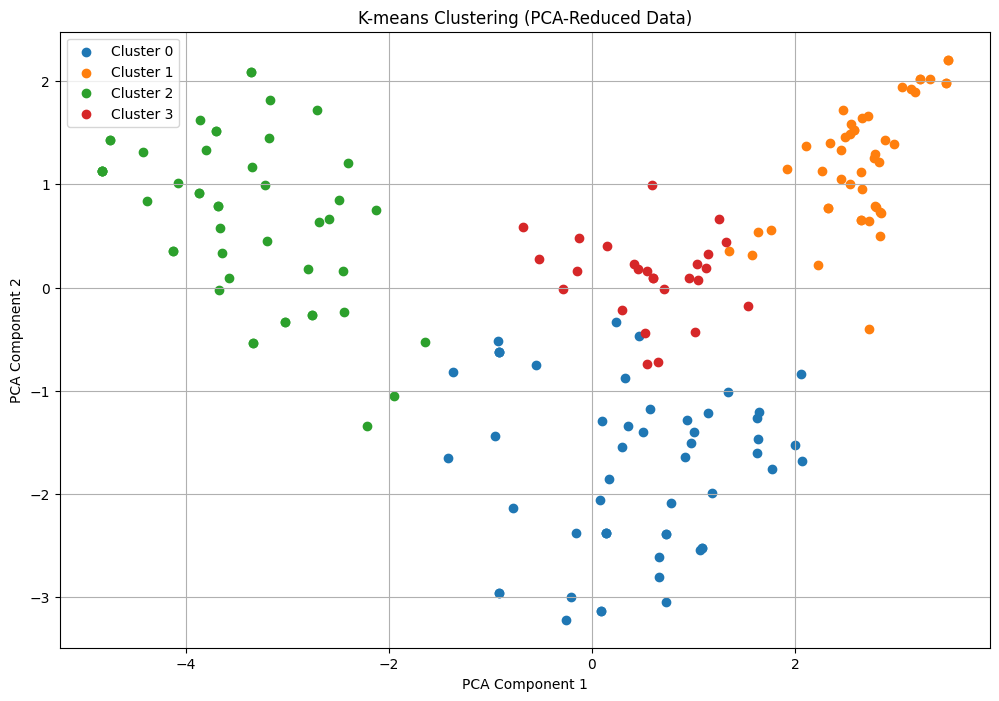

In [19]:
from sklearn.decomposition import PCA
#Initialize PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(similarity_matrix)
# Plot clusters
plt.figure(figsize=(12, 8))
for cluster in range(optimal_clusters):
    cluster_points = reduced_data[final_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('K-means Clustering (PCA-Reduced Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()


In [20]:
cluster_characteristics = df.groupby('Cluster').mean()
#Print the summary of cluster characteristics
print(cluster_characteristics)

             record            id      S1r1      S1r2      S1r3      S2r1  \
Cluster                                                                     
0         74.584906  5.312342e+06  0.603774  0.226415  0.169811  1.000000   
1        102.479167  4.435541e+06  0.604167  0.166667  0.229167  1.000000   
2         89.687500  5.753538e+06  0.770833  0.104167  0.125000  1.000000   
3         85.500000  5.816814e+06  0.192308  0.230769  0.076923  0.076923   

         S2r2      S3r1      S3r2      S4r1  ...      Q6r1      Q6r2  \
Cluster                                      ...                       
0         0.0  0.452830  0.547170  0.000000  ...  0.037736  0.358491   
1         0.0  0.520833  0.479167  0.000000  ...  0.416667  0.125000   
2         0.0  0.500000  0.500000  0.687500  ...  0.104167  0.000000   
3         1.0  0.038462  0.115385  0.153846  ...  0.076923  0.038462   

             Q6r3      Q6r4      Q6r5      Q7r1      Q7r2      Q7r3      Q7r4  \
Cluster                

# **Interpret Results**

Based on survey data, the clustering analysis identified **four** unique customer groups. Every cluster reflects distinct running-related behavioral tendencies and preferences. These findings can be used to create targeted marketing and product-provider strategies.

1.  Cluster 0:
    This group likely represents **casual runners** who engage moderately in the running and prefer versatile, comfortable gear. Their preferences suggest they are motivated by a mix of style and practicality.

2.  Cluster 1:
    This group appears to consist of **performance-driven runners** who focus on functionality and results. Their strong motivation is rooted in competition and personal achievement, making them goal-oriented and highly competitive individuals.

3.  Cluster 2:
    This group likely represents **highly engaged runners** who **value style and functionality equally**. They are deeply involved in running and seek products that combine aesthetics with technical performance.

4.  Cluster 3:
    This group likely represents **beginners or newbies**who are not actively engaged in running. They might be new to the activity or participate very occasionally.


**Recommendations for Product Portfolio and Marketing Strategies**


**Product Portfolio Recommendations**

1.   Cluster 0 :

  *   Offer versatile, all-purpose running gear that is comfortable and moderately stylish.
  *   Highlight affordability and durability to attract casual users.

2.   Cluster 1 :

  *   Focus on high-performance products such as advanced running shoes, moisture-wicking apparel.
  *   Emphasize technical specifications and performance enhancements in product marketing.

3.   Cluster 2 :

  *   Create premium offerings that combine cutting-edge technology with stylish designs.
  *   Launch limited-edition or customizable products to appeal to their focus on aesthetics.

4.   Cluster 3 :

  *   Provide affordable, entry-level gear to encourage participation in running.
  *   Include starter kits or beginner-friendly options in the product lineup.


**Marketing Strategy Recommendations**:

1.   Cluster 0 :

  *   Use broad, generalized campaigns that promote the joy of running and the social aspects of staying active.
  *   Leverage social media platforms for visually appealing content showcasing running as a casual and fun activity.
2.   Cluster 1 :

  *   Sponsor marathons, races, or fitness challenges to engage this competitive audience.
  *   Collaborate with athletes, coaches, or influencers to promote products focused on performance.

3.   Cluster 2 :

  *   Highlight product exclusivity with limited-edition releases or customization options.
  *   Focus on visually driven campaigns using platforms like Instagram to showcase stylish and innovative gear.

4.   Cluster 3 :

  *   Focus on visually driven campaigns using platforms like Instagram to showcase stylish and innovative gear.
  *   Promote simple, affordable gear using approachable messaging and beginner-oriented blogs or videos.












**Personalization Opportunities:**

*   Event Targeting:
  *   Organize running events tailored to clusters:
      *   Cluster 1: Competitive races.
      *   Cluster 0 and 3: Fun runs or community-based activities.

*   Targeted Ads:
  *   Use social media and digital ads tailored to each cluster’s preferences:
      *   Highlight performance metrics for Cluster 1.
      *   Showcase visually appealing, trendy gear for Cluster 2.
      *   Promote approachable content for Cluster 3.

*   Loyalty Programs:
  *   Create tiered loyalty programs to engage all clusters:
      *   Cluster 1 and 2: Offer rewards for milestones, like distance covered or races completed.
      *   Cluster 0 and 3: Provide discounts for consistent purchases or referrals.
      








#**Refrences**

*   W3-schools:https://www.w3schools.com/python/python_ml_k-means.asp
*   Lecture PPT's
*   Youtube




